In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import pandas as pd 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from config import COLUMN_MAP


In [3]:
DATASET = os.path.join('2021-SxS-Data-and-Data-Info', 'NFCS_2021_State_Data.csv') 

df = pd.read_csv(DATASET)


col_list = list(df.columns)
col_list = [COLUMN_MAP[col] if col in COLUMN_MAP else col for col in col_list]
df.columns = col_list

df.describe()



,NFCSID,STATE,CENSUSDIV,CENSUSREG,BINARIZED GENDER,AGE,GENDER/AGE NET,A4A_new_w,A5_2015,MARITAL_STATUS,...,Expected Growth of Savings in 5 Years,Effect of Inflation on Purchasing Power,Relationship Between Interest Rates and Bond Prices,Years to Double Loan at 20% Interest Rate,Highest Probability of Getting a Disease,True or False: 15-year Mortgage vs. 30-year Mortgage,True or False: Single Company’s Stock vs. Stock Mutual Fund,wgt_n2,wgt_d2,wgt_s3
count,2.711800e+04,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,...,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000,27118.000000
mean,2.021024e+09,25.719301,5.339627,2.743418,1.540342,3.732650,6.974703,1.260196,4.422450,1.890921,...,15.971716,24.608599,40.859208,30.128033,33.857364,20.983738,45.376945,1.000000,1.000000,1.000000
std,7.828437e+03,14.863040,2.597738,1.057597,0.498379,1.665568,3.435199,0.438750,1.710966,1.165150,...,34.797002,40.239771,47.100468,43.284233,45.448122,39.141361,47.901479,0.664533,0.806993,0.301259
min,2.021010e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.285976,0.062408,0.270807
25%,2.021017e+09,12.000000,3.000000,2.000000,1.000000,2.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.462335,0.365107,0.839477
50%,2.021024e+09,26.000000,5.000000,3.000000,2.000000,4.000000,7.000000,1.000000,4.000000,2.000000,...,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.846939,0.783109,0.952120
75%,2.021030e+09,38.000000,8.000000,4.000000,2.000000,5.000000,10.000000,2.000000,6.000000,2.000000,...,2.000000,3.000000,98.000000,98.000000,98.000000,2.000000,98.000000,1.341735,1.338188,1.093767
max,2.021037e+09,51.000000,9.000000,4.000000,2.000000,6.000000,12.000000,2.000000,7.000000,5.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.355691,5.395601,11.127572


In [4]:
df.columns[20:60]

Index(['PART_TIME_STUDENT', 'KNOWLEDGE_ABOUT_FINANCE',
       'HIGHEST_EDUCATION_OF_RAISERS', 'SATISFACTION_WITH_FINANCIAL_CONDITION',
       'WILLINGNESS_TO_TAKE_RISKS', 'SPENDING_COMPARISON_TO_INCOME',
       'DIFFICULTY_COVERING_EXPENSES', 'INCOME_VARIABILITY', 'EMERGENCY_FUNDS',
       'SAVING_FOR_CHILDRENS_EDUCATION', 'FIGURING_OUT_RETIREMENT_SAVING',
       'FIGURING_OUT_RETIREMENT_BEFORE_RETIREMENT',
       'EXPERIENCED_LARGE_INCOME_DROP', 'CONFIDENCE_GET_2000',
       'RECEIVED_STIMULUS_PAYMENT', 'J51_1', 'J51_2', 'J51_3', 'J51_4',
       'J51_5', 'J51_6', 'J51_98', 'J51_99', 'LAYOFF_PANDEMIC',
       'CREDIT_RECORD_RATING', 'FIN_ANXIETY',
       'FREQUENCY_OF_THINKING_ABOUT_FINANCES', 'J41_1', 'J41_2', 'J41_3',
       'J42_1', 'J42_2', 'FIN_CONFIDENCE', 'CHECKING_ACCOUNT',
       'SAVINGS_ACCOUNT', 'OVERDRAW_CHECKING_ACCOUNT', 'ONLINE_BANKING',
       'MOBILE_BANKING', 'MOBILE_PAYMENT_IN_PERSON',
       'MOBILE_TRANSFER_TO_ANOTHER_PERSON'],
      dtype='object')

In [5]:
df['AGE'].value_counts()

AGE
6    5501
5    4731
2    4696
4    4617
3    4564
1    3009
Name: count, dtype: int64

In [6]:
df['BINARIZED GENDER'].value_counts()

BINARIZED GENDER
2    14653
1    12465
Name: count, dtype: int64

In [7]:
treat_df = df[df['FIN_ED_HS']== '1']

In [8]:
df[df['FIN_ED_HS']== '1']['PART_TIME_STUDENT'].value_counts()

PART_TIME_STUDENT
2     1730
      1380
1      222
99       8
98       5
Name: count, dtype: int64

In [9]:
treat_df['ALWAYS_PAY_CR_FULL_12MO'].value_counts()

ALWAYS_PAY_CR_FULL_12MO
1     1705
2      964
       614
98      50
99      12
Name: count, dtype: int64

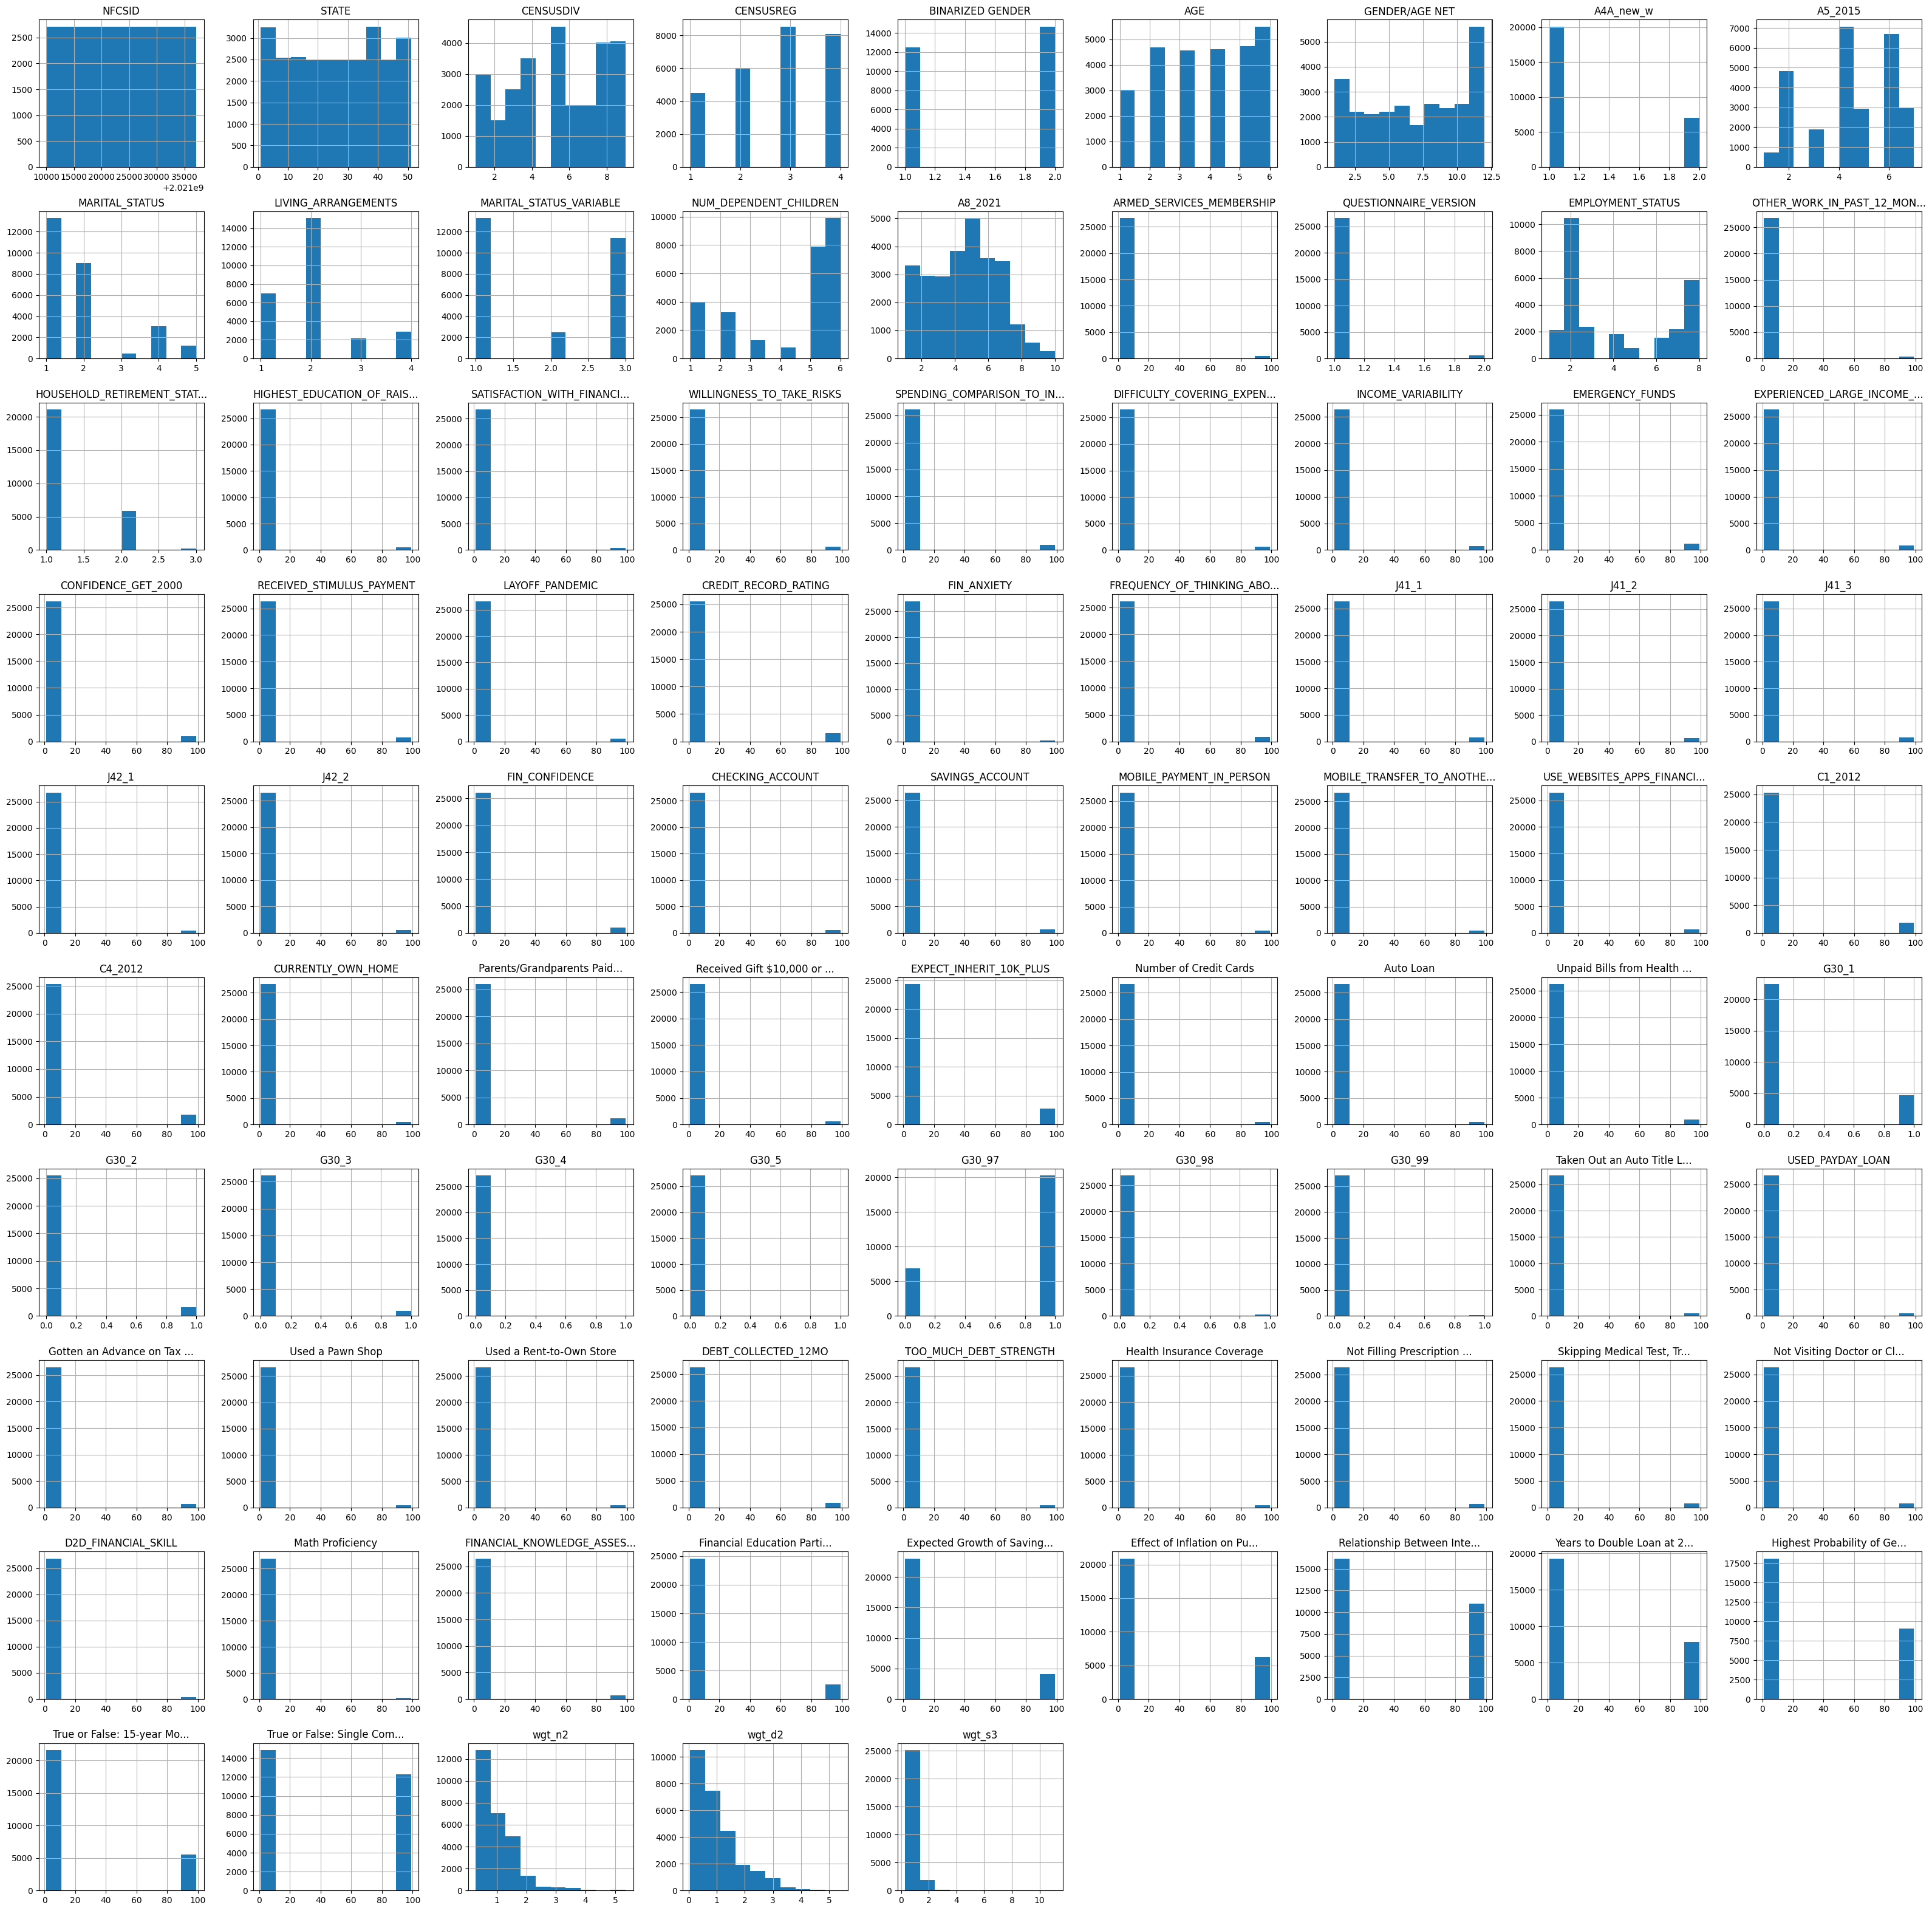

In [10]:
# Assuming df is your DataFrame with the data
plt.rcParams['figure.figsize'] = [40, 40]
axes = df.hist()

# Truncate x-axis labels to a maximum length of 30 characters
for ax in axes.flatten():
    title = ax.get_title()
    ax.set_title(str(title)[:25] + '...' if len(str(title)) > 25 else title)

plt.show()

In [11]:
df['AGE'].value_counts()

AGE
6    5501
5    4731
2    4696
4    4617
3    4564
1    3009
Name: count, dtype: int64

In [12]:
df['NUM_DEPENDENT_CHILDREN'].value_counts()

NUM_DEPENDENT_CHILDREN
6    9903
5    7887
1    3996
2    3269
3    1300
4     763
Name: count, dtype: int64

In [13]:
all_cols = OUTCOME_VARS
all_cols.extend(DUMMY_COVARIATES)
all_cols.extend(TREATMENT_COLS)
all_cols = list(set(all_cols))
all_cols

NameError: name 'OUTCOME_VARS' is not defined

In [ ]:
dat = df.loc[:, all_cols]

KeyError: "['CONFIDENCE_COMING_UP_WITH_2000', 'N52', 'EDUCATION_LEVEL', 'Received Financial Education in High School', 'BINARIZED_GENDER', 'RACE_ETHNICITY'] not in index"

In [ ]:
df.loc[:, OUTCOME_VARS]

KeyError: "['CONFIDENCE_COMING_UP_WITH_2000', 'RACE_ETHNICITY', 'EDUCATION_LEVEL', 'BINARIZED_GENDER', 'N52', 'Received Financial Education in High School'] not in index"

In [ ]:
df.columns[]

Index(['NFCSID', 'STATE', 'CENSUSDIV', 'CENSUSREG', 'BINARIZED GENDER', 'AGE',
       'GENDER/AGE NET', 'A4A_new_w', 'A5_2015', 'MARITAL_STATUS',
       ...
       'Expected Growth of Savings in 5 Years',
       'Effect of Inflation on Purchasing Power',
       'Relationship Between Interest Rates and Bond Prices',
       'Years to Double Loan at 20% Interest Rate',
       'Highest Probability of Getting a Disease',
       'True or False: 15-year Mortgage vs. 30-year Mortgage',
       'True or False: Single Company’s Stock vs. Stock Mutual Fund', 'wgt_n2',
       'wgt_d2', 'wgt_s3'],
      dtype='object', length=126)